## Validate Code using Bipolar

In [74]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.style.use('seaborn-poster')
lines = ["-","--","-.",":", "o", "v", "d", "^", "<", ">", "1", "2", "3", "4", "s", "p", "*"]

# path = sys.argv

# folder = str(path[1])
# filename = str(path[2])


Import data

In [75]:
%%bash
tree ../gxx/nunubar -L 1

../gxx/nunubar
├── ctheta-0-0-1-0
├── fullplot-full-record.py
├── neutrino-headon-nunubar_MU_0.500000_REFL0.000000_ITER9000000_STEPS10000_RANGE1.000000_TH_22_t2018-2-22-14-10-25.csv
├── neutrino-headon-nunubar_MU_0.500000_REFL0.000000_ITER9000000_STEPS10000_RANGE1.000000_TH_22_t2018-2-23-14-0-3.csv
├── neutrino-headon-nunubar_MU_0.500000_REFL0.010000_ITER9000000_STEPS10000_RANGE1.000000_TH_22_t2018-2-23-20-25-57.csv
├── neutrino-headon-nunubar_MU_0.500000_REFL0.020000_ITER9000000_STEPS10000_RANGE1.000000_TH_22_t2018-2-24-2-51-48.csv
├── neutrino-headon-nunubar_MU_0.500000_REFL0.090000_ITER9000000_STEPS10000_RANGE1.000000_TH_22_t2018-2-24-9-17-43.csv
├── neutrino-headon-nunubar_MU_0.500000_REFL0.100000_ITER9000000_STEPS10000_RANGE1.000000_TH_22_t2018-2-22-23-49-5.csv
├── neutrino-headon-nunubar_MU_0.500000_REFL0.100000_ITER9000000_STEPS10000_RANGE1.000000_TH_22_t2018-2-24-15-43-37.csv
├── neutrino-headon-nunubar_MU_1.000000_REFL0.000000_ITER9000000_STEPS10000_RANGE1.000000_TH_22_t2018-2

In [98]:
data0 = np.genfromtxt('../gxx/nunubar/neutrino-headon-nunubar_MU_4.000000_REFL0.000000_ITER15000000_STEPS500000_RANGE5.000000_TH_22_t2018-2-24-18-56-29.csv', delimiter = ", ")
data = np.genfromtxt('../gxx/nunubar/neutrino-headon-nunubar_MU_4.000000_REFL0.000000_ITER15000000_STEPS500000_RANGE5.000000_TH_22_t2018-2-24-18-56-29.csv', delimiter = ", ")
print("Data Loaded")


Data Loaded


In [99]:
len(data)

13

In [100]:
totlen = len(data)
lendata = int(len(data[0])/2)
seg = 2

idx = 7

xdata0_f = data0[0][:lendata:seg]
ydata0_off_f = np.sqrt( (data0[idx-2][:lendata:seg] )**2 + (data0[idx-1][:lendata:seg] )**2 )
xdata0_b = data0[0][:lendata:seg][::-1]
ydata0_off_b = np.sqrt( (data0[idx-2][lendata:-1:seg] )**2 + (data0[idx-1][lendata:-1:seg] )**2 )
ydata0_diag_f = data0[idx-3][:lendata:seg]/2+0.5
ydata0_diag_b = data0[idx-3][lendata:-1:seg]/2+0.5
# ydata = data[-3][:lendata]

xdata_f = data[0][:lendata:seg]
ydata_off_f = np.sqrt( ( data[idx-2][:lendata:seg] )**2 + (data[idx-1][:lendata:seg])**2 )
xdata_b = data[0][:lendata:seg][::-1]
ydata_off_b = np.sqrt( (data[idx-2][lendata:-1:seg])**2 + (data[idx-1][lendata:-1:seg])**2 )
ydata_diag_f = data[idx-3][:lendata:seg]/2+0.5
ydata_diag_b = data[idx-3][lendata:-1:seg]/2+0.5

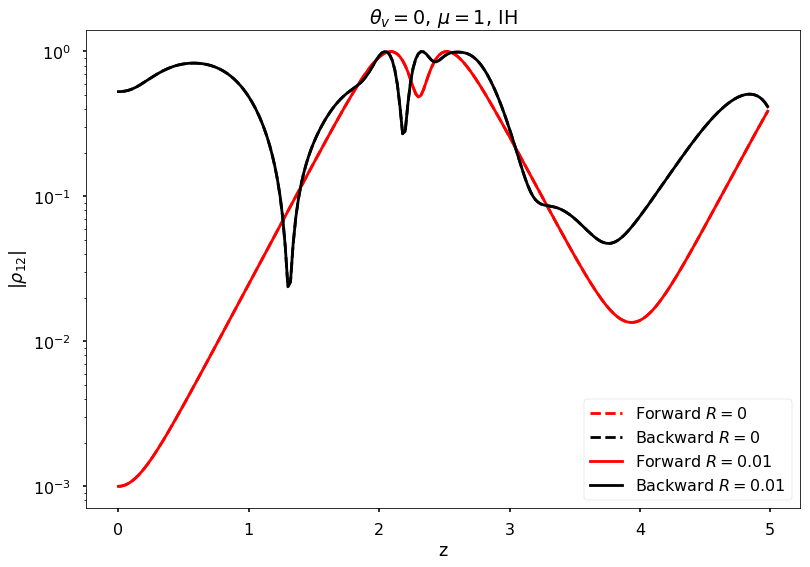

In [101]:
plt.semilogy( xdata0_f, ydata0_off_f, "r--", label='Forward $R=0$')
plt.semilogy( xdata0_b, ydata0_off_b, "k--", label='Backward $R=0$')

plt.semilogy( xdata_f, ydata_off_f, "r-", label='Forward $R=0.01$')
plt.semilogy( xdata_b, ydata_off_b, "k-", label='Backward $R=0.01$')
plt.xlabel("z")
plt.ylabel("$\\vert\\rho_{12}\\vert$")
plt.title("$\\theta_v=0$, $\\mu=1$, IH")
# plt.ylim([1e-6,1e-1])
plt.legend()
# plt.savefig("export/halo-nunubar-ih-theta-0-mu-4-r-0.1-offdiag.svg")
plt.show()

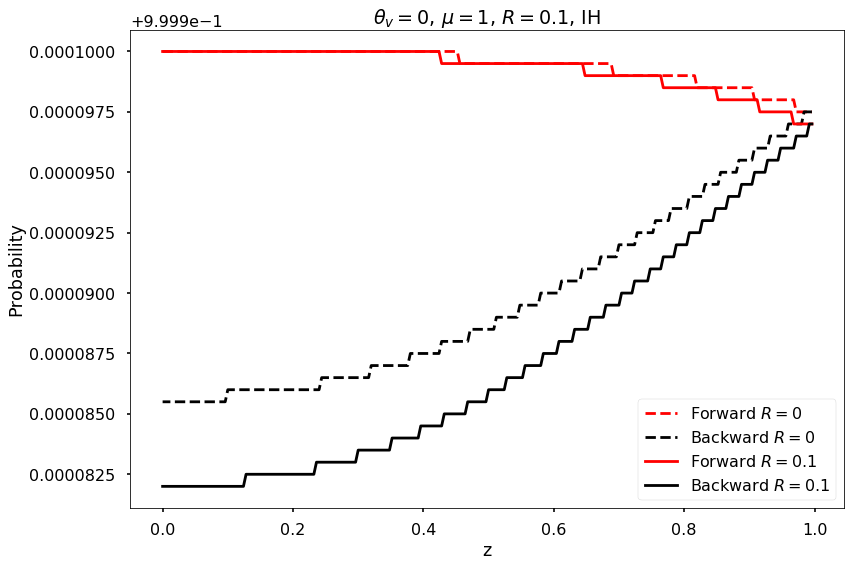

In [93]:
plt.plot( xdata0_f, ydata0_diag_f, "r--", label='Forward $R=0$')
plt.plot( xdata0_b, ydata0_diag_b, "k--", label='Backward $R=0$')

plt.plot( xdata_f, ydata_diag_f, "r-", label='Forward $R=0.1$')
plt.plot( xdata_b, ydata_diag_b, "k-", label='Backward $R=0.1$')

plt.xlabel("z")
plt.ylabel("Probability")
plt.title("$\\theta_v=0$, $\\mu=1$, $R=0.1$, IH")
plt.legend()
# plt.savefig("export/halo-nunubar-ih-theta-0-mu-4-r-0.1-diag.svg")
plt.show()

## Linear Regime

In [84]:
bgp = 7
edp = -6

slopefit,interceptfit = np.polyfit(xdata[bgp:edp], np.log(  ydata[bgp:edp] ) , 1)

print(slopefit,interceptfit)

2.25587197551772 -2.004553607494371


In [85]:
omegav = -1
mu = 40
alpha = 1

slopeth = np.sqrt((1-alpha)**2 * mu**2 + 4 * (1 + alpha) * mu * omegav + 4* omegav**2 +0*1j) / 2
print(slopeth.imag)

8.888194417315589


In [86]:
slopefit/slopeth.imag

0.25380542656930744

In [87]:
def fit(k, b, x):
    return k*x+b

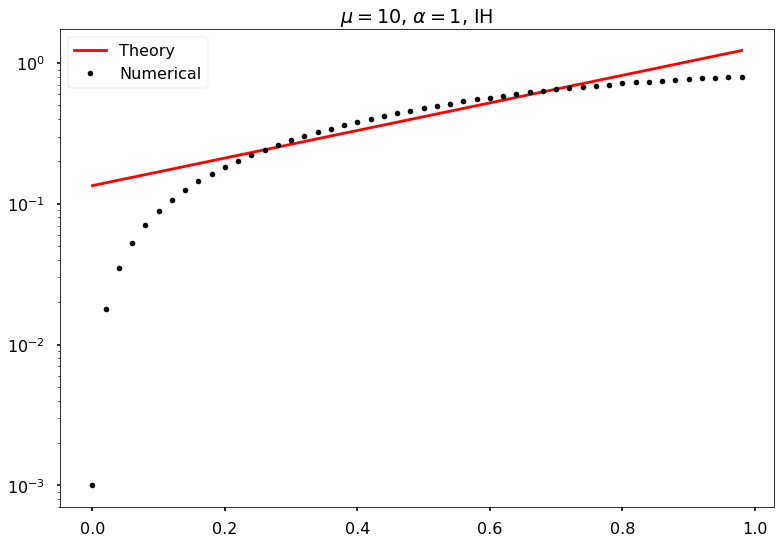

In [88]:
plt.semilogy( xdata, np.exp( fit(slopefit, interceptfit, xdata) ) , "r-", label="Theory")
plt.semilogy( xdata, ydata, "k.", label='Numerical')
plt.legend()
plt.title("$\mu=10$, $\\alpha=1$, IH")
plt.show()